# MACHINE LEARNING MODEL TO PREDICT THE PERSON IS DIABETIC OR NOT

# IMPORT DEPENDENCIES

In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#read the data file
data =pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

# 1.Univariate Analysis on categorical feature

<Axes: >

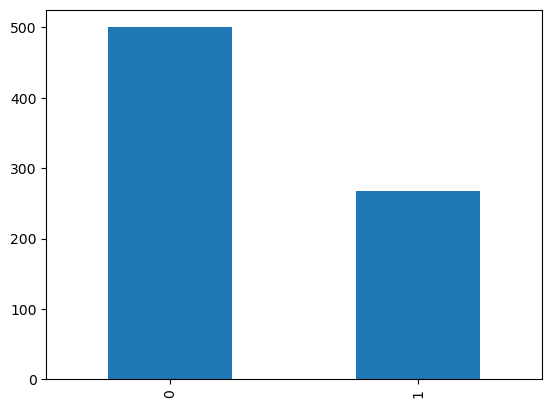

In [5]:
#sns.countplot(data['Outcome'])
data['Outcome'].value_counts().plot(kind='bar')

<Axes: ylabel='Outcome'>

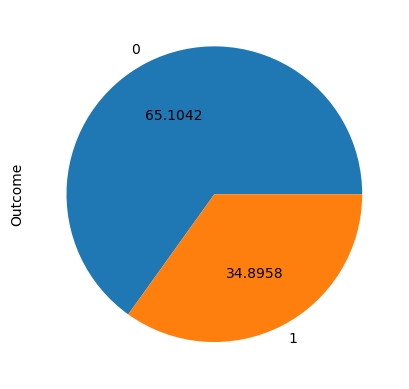

In [6]:
data['Outcome'].value_counts().plot(kind='pie',autopct='%.4f')

On numarical feature

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

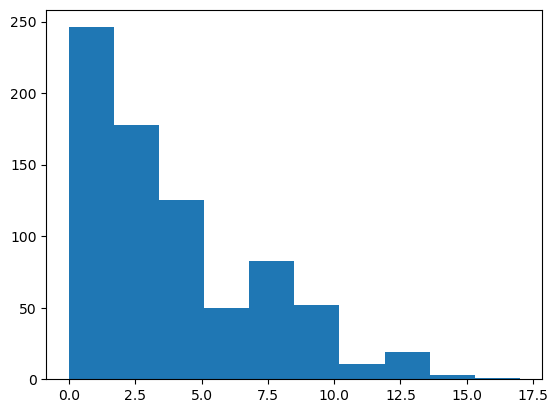

In [7]:
plt.hist(data['Pregnancies'])

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

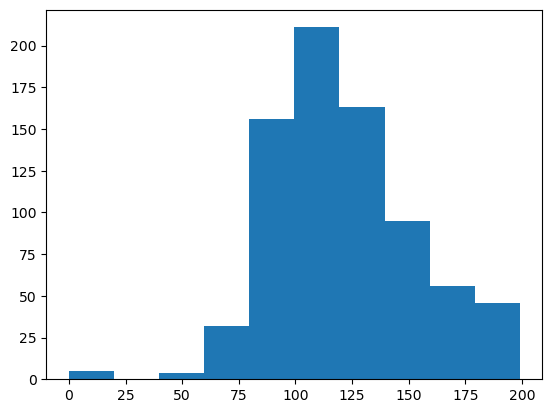

In [8]:
plt.hist(data['Glucose'])

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

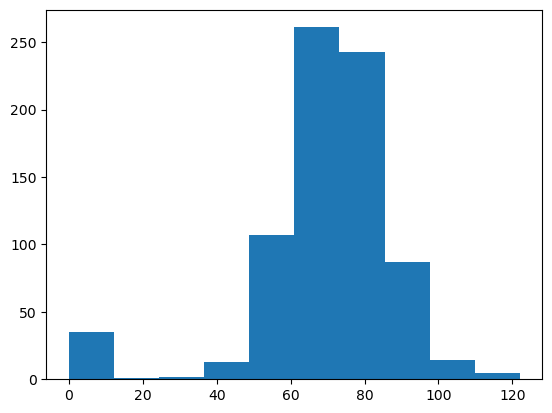

In [9]:
plt.hist(data['BloodPressure'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

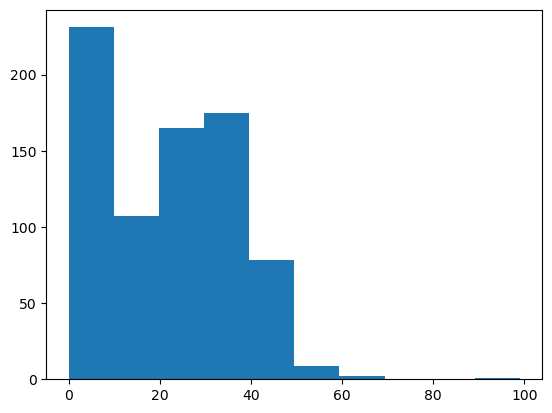

In [10]:
plt.hist(data['SkinThickness'])

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

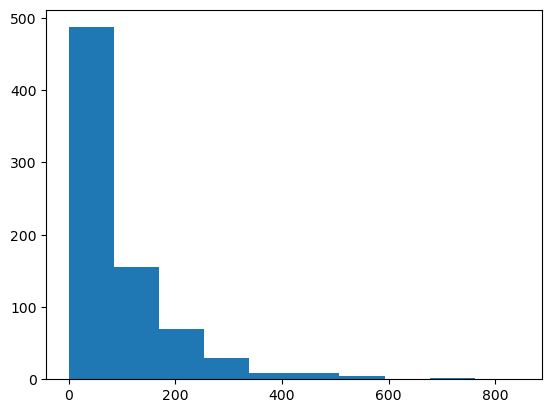

In [11]:
plt.hist(data['Insulin'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

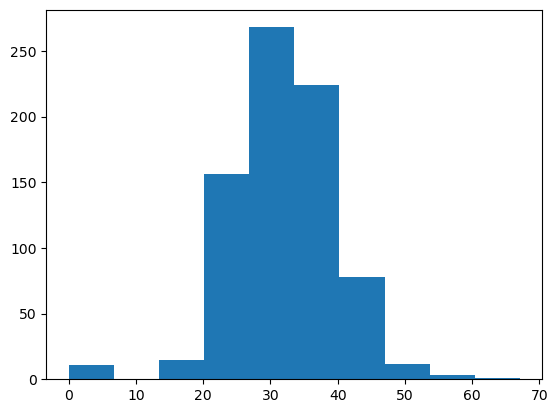

In [12]:
plt.hist(data['BMI'])

(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

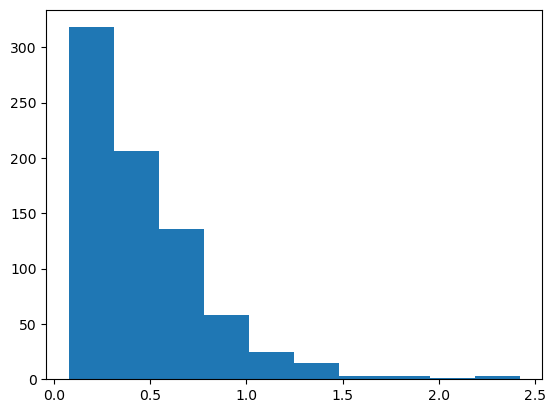

In [13]:
plt.hist(data['DiabetesPedigreeFunction'])

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

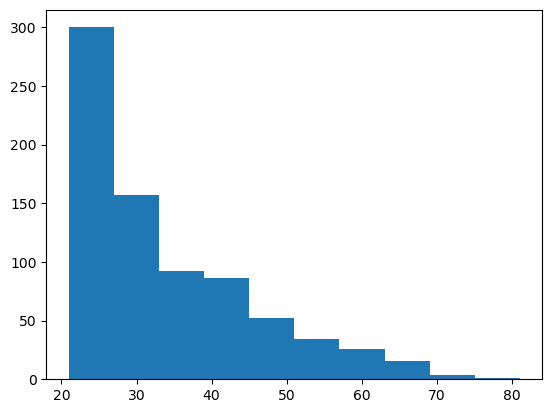

In [14]:
plt.hist(data['Age'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\3426279659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pregnancies'])


<Axes: xlabel='Pregnancies', ylabel='Density'>

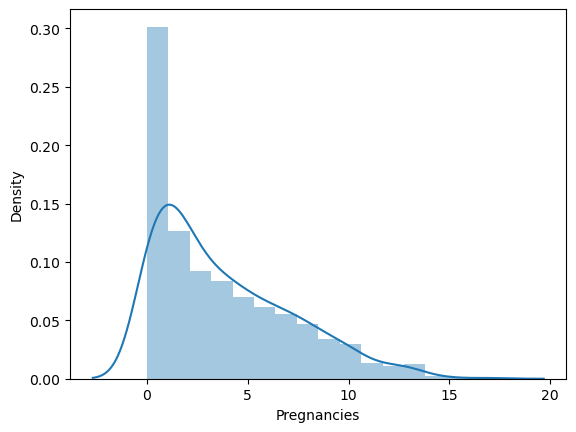

In [15]:
sns.distplot(data['Pregnancies'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\1475984872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

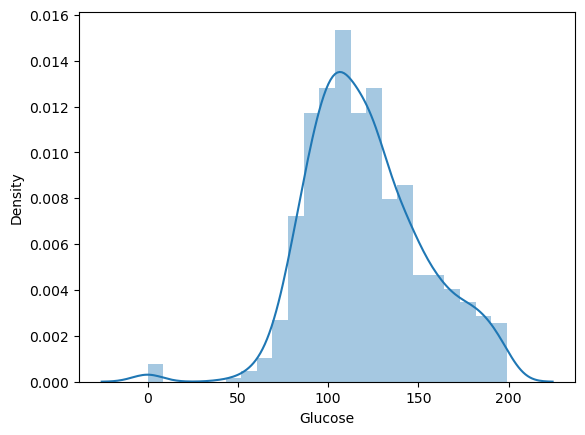

In [16]:
sns.distplot(data['Glucose'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\3514935741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

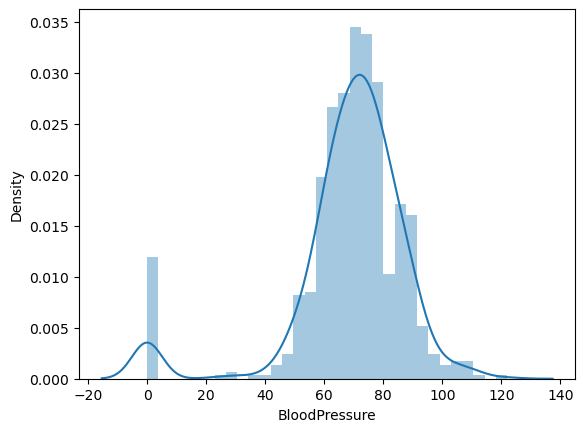

In [17]:
sns.distplot(data['BloodPressure'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\1087922965.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

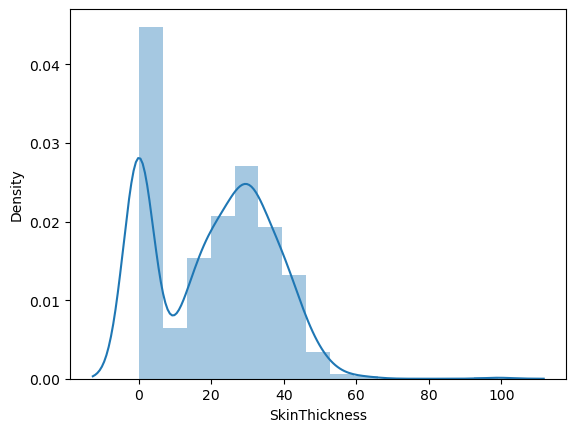

In [18]:
sns.distplot(data['SkinThickness'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\4080507389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

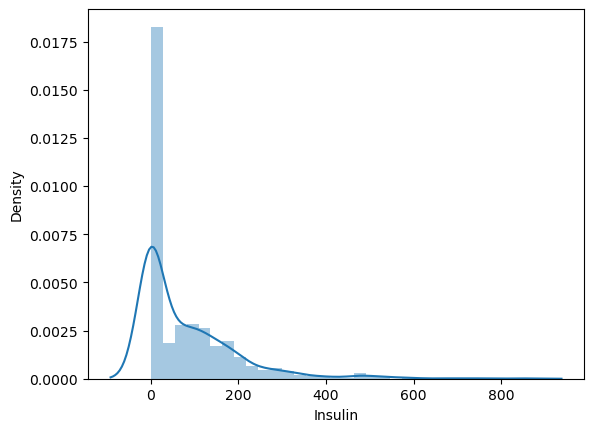

In [19]:
sns.distplot(data['Insulin'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\613475808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

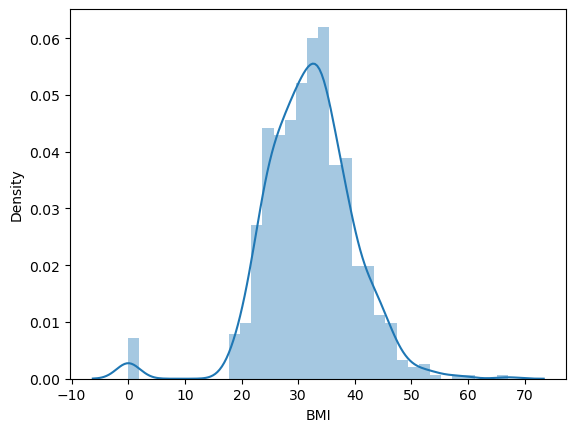

In [20]:
sns.distplot(data['BMI'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\1100508857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DiabetesPedigreeFunction'])


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

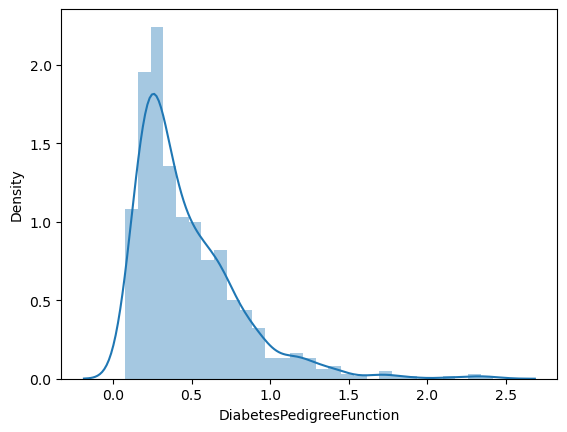

In [21]:
sns.distplot(data['DiabetesPedigreeFunction'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

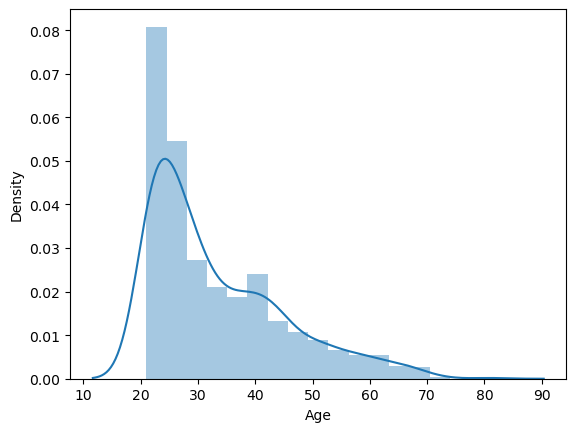

In [22]:
sns.distplot(data['Age'])

<Axes: >

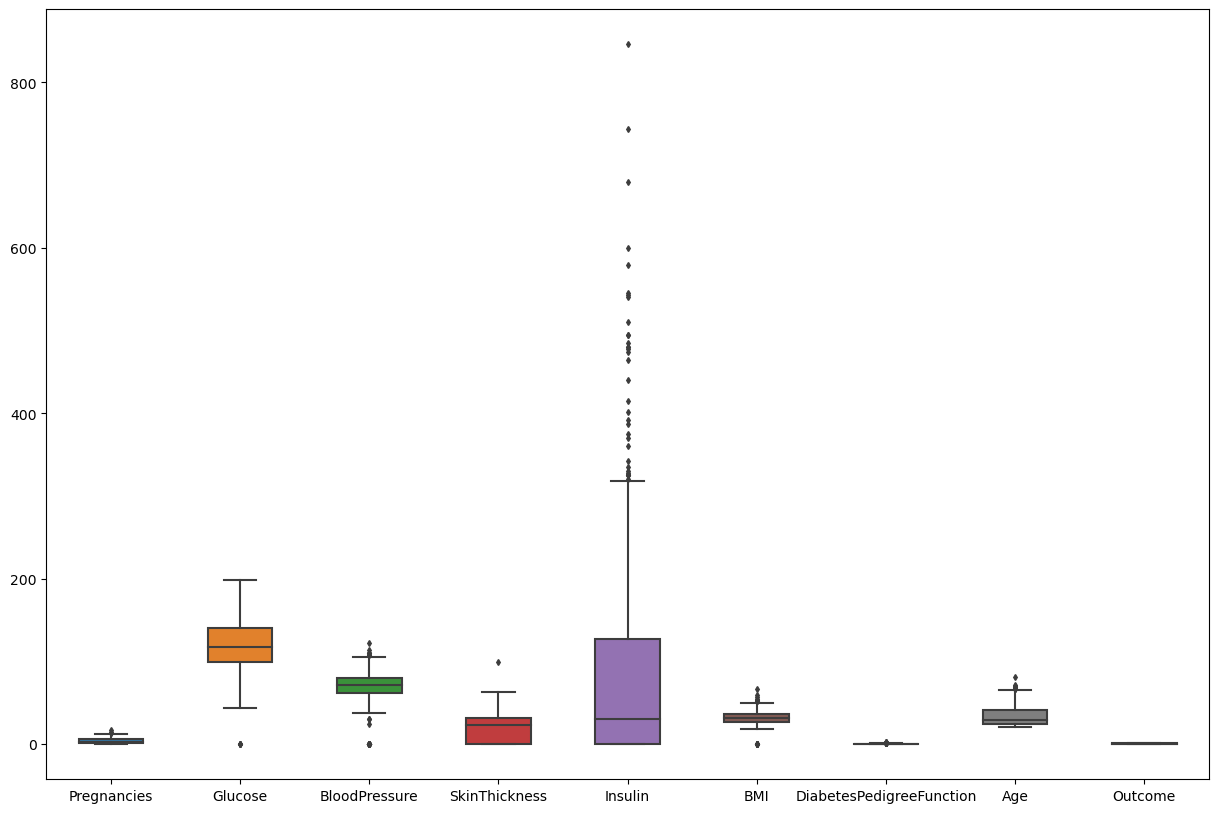

In [23]:
#now we have dealt with the 0 values and data looks better. But, there still are
#outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

# Bivariate Analysis

<Axes: xlabel='Age', ylabel='BloodPressure'>

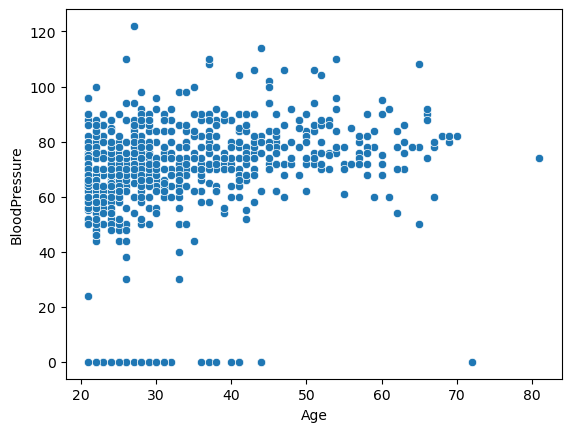

In [24]:
sns.scatterplot(x=data['Age'],y=data['BloodPressure'])

<Axes: xlabel='Outcome', ylabel='Age'>

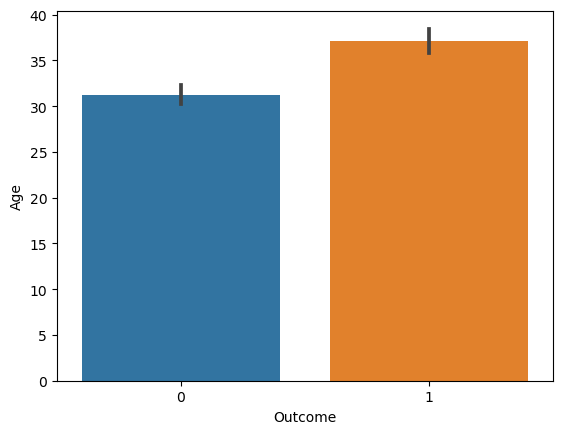

In [25]:
sns.barplot(x=data['Outcome'],y=data['Age'])

C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\282527456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Outcome']==0]['Age'],color='r',hist=False)
C:\Users\yasar beg\AppData\Local\Temp\ipykernel_49988\282527456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

<Axes: xlabel='Age', ylabel='Density'>

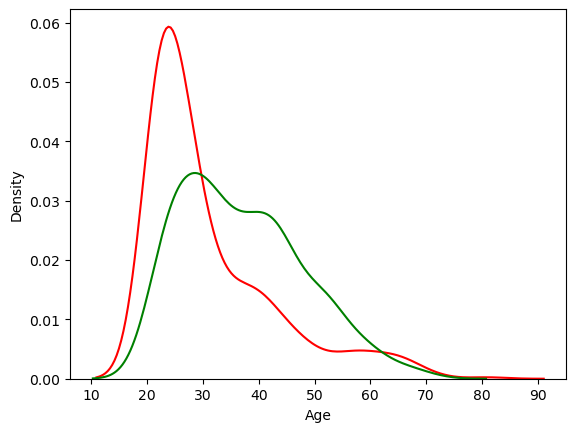

In [26]:
sns.distplot(data[data['Outcome']==0]['Age'],color='r',hist=False)
sns.distplot(data[data['Outcome']==1]['Age'],color='g',hist=False)

<Axes: xlabel='Outcome'>

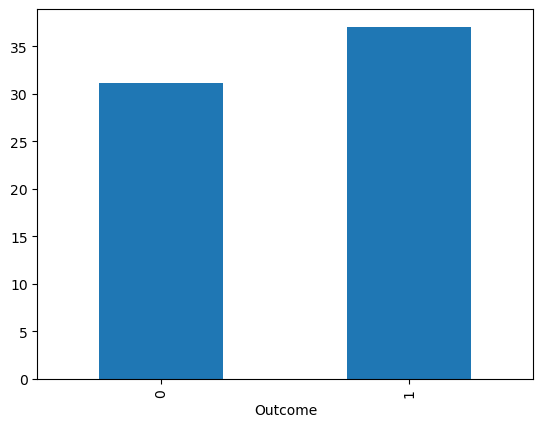

In [27]:
(data.groupby('Outcome').mean()['Age']).plot(kind='bar')

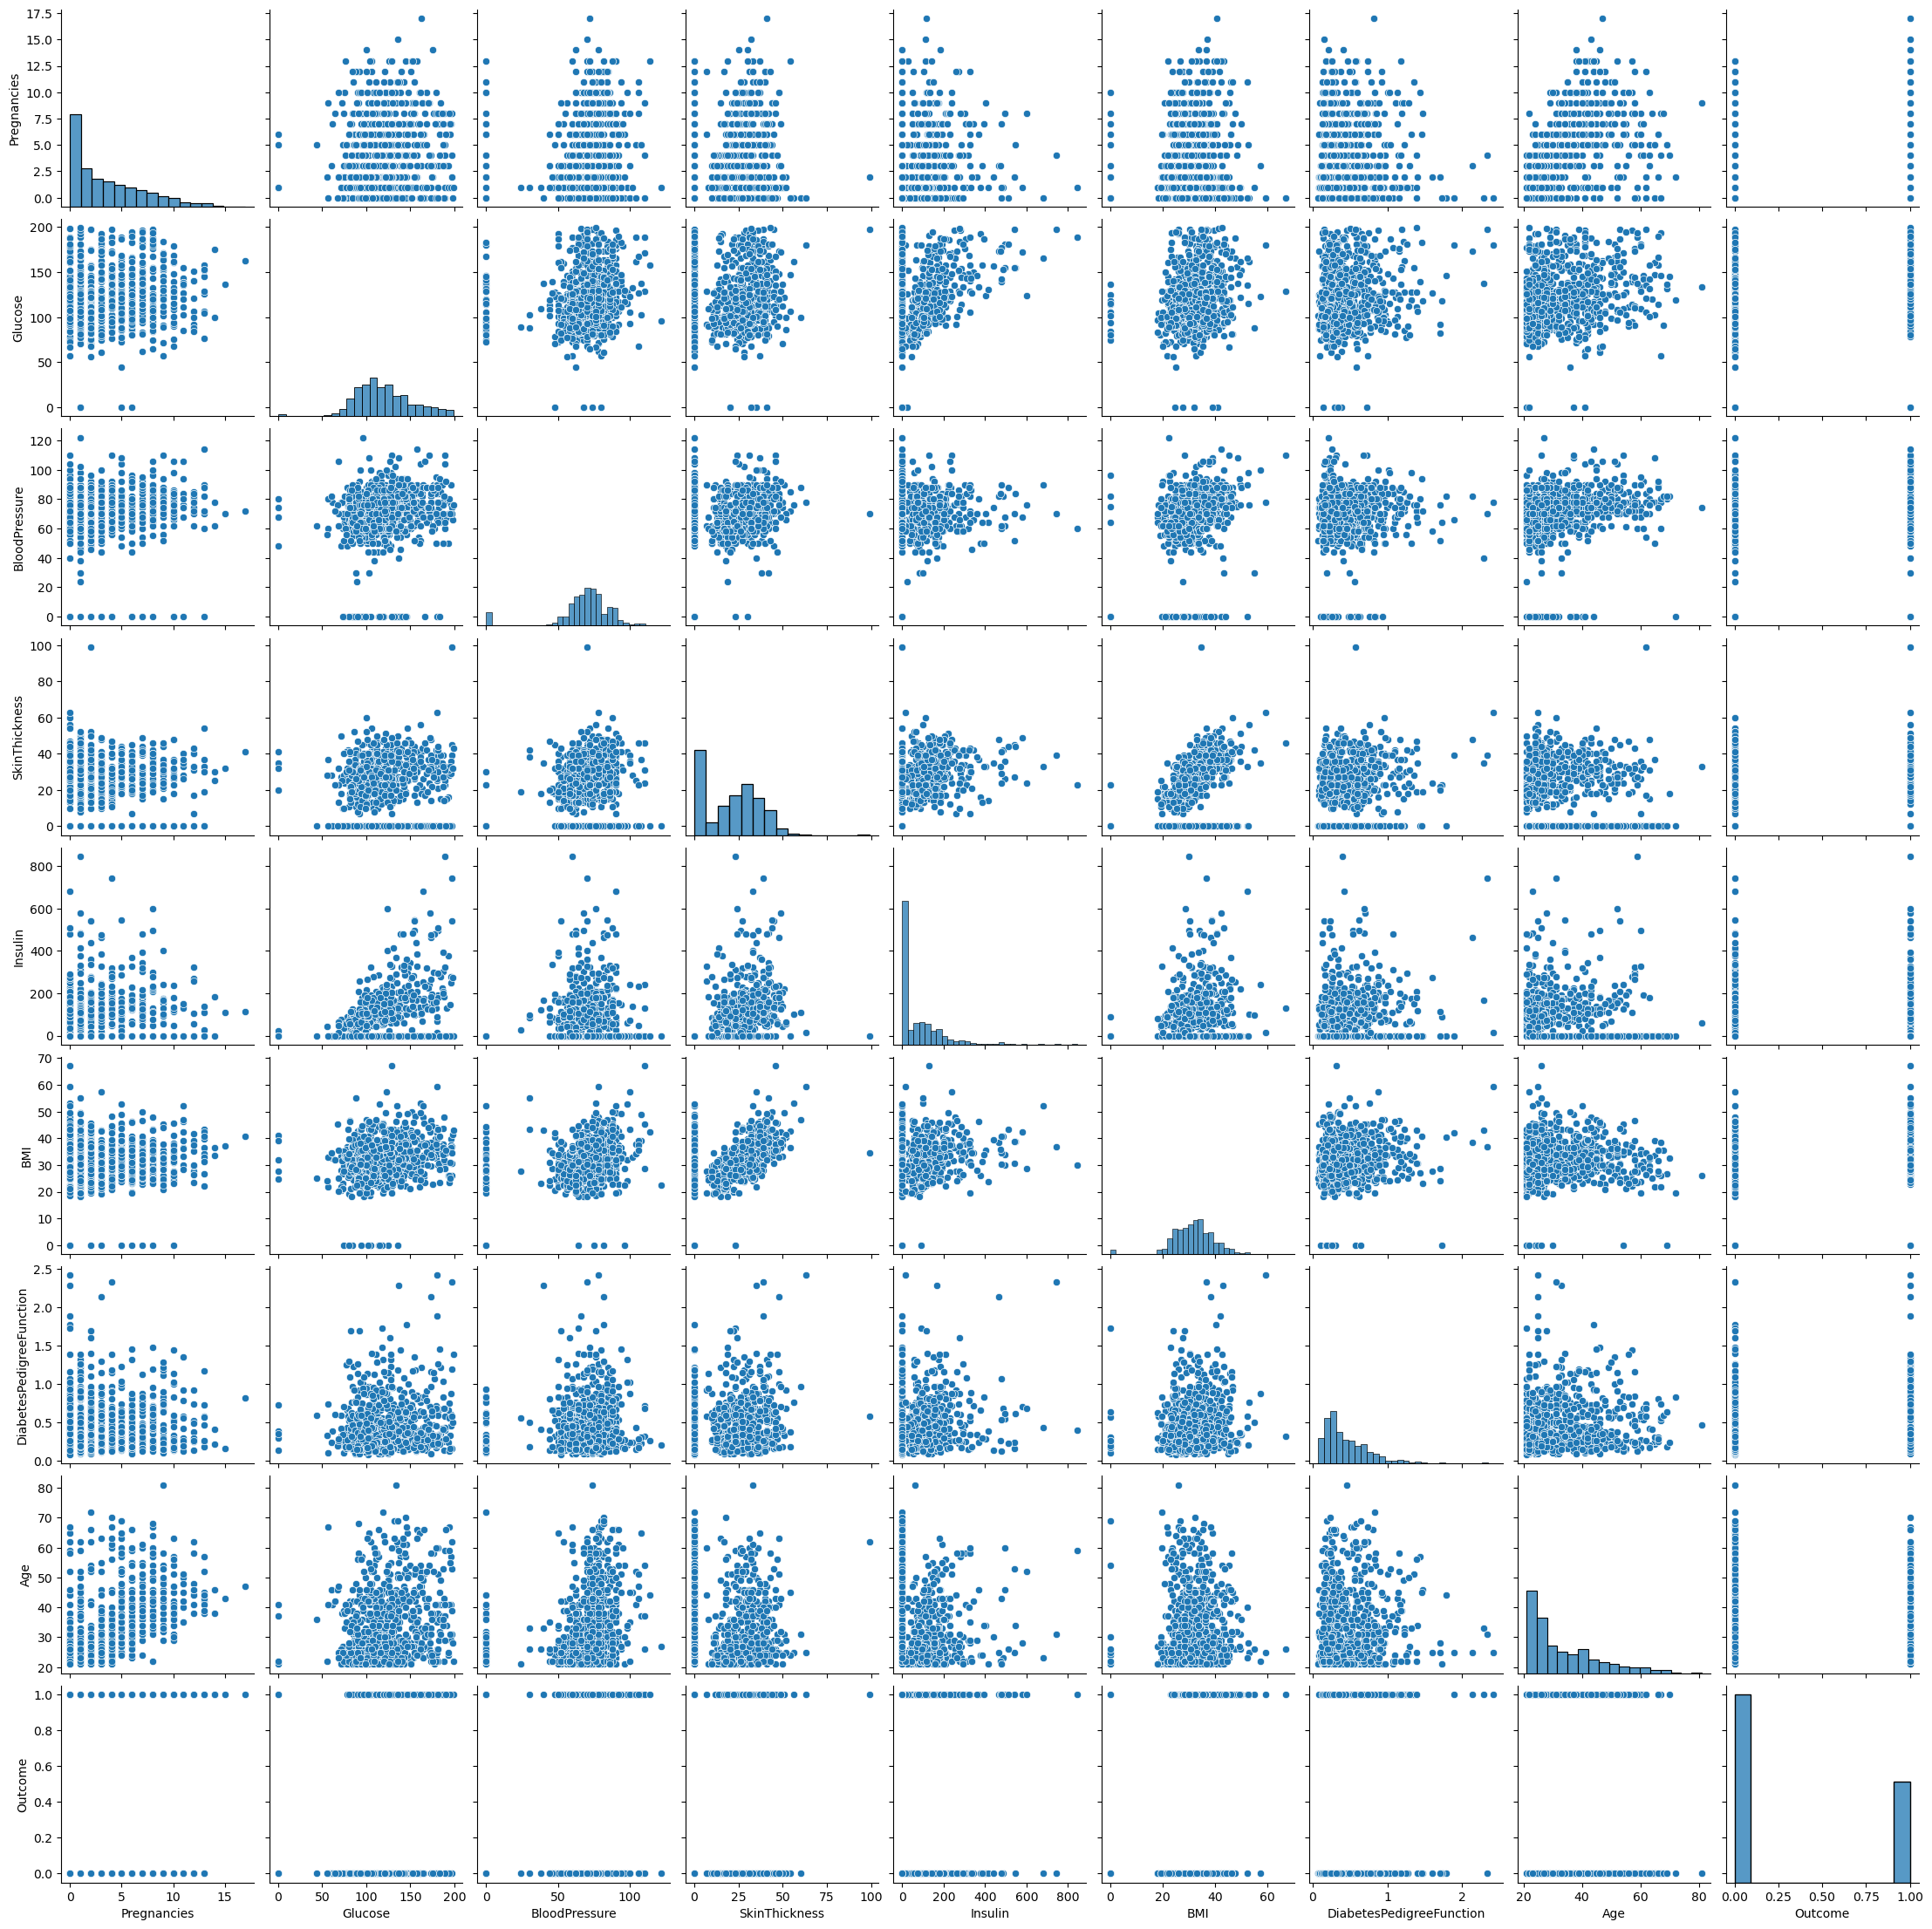

In [28]:
sns.pairplot(data)

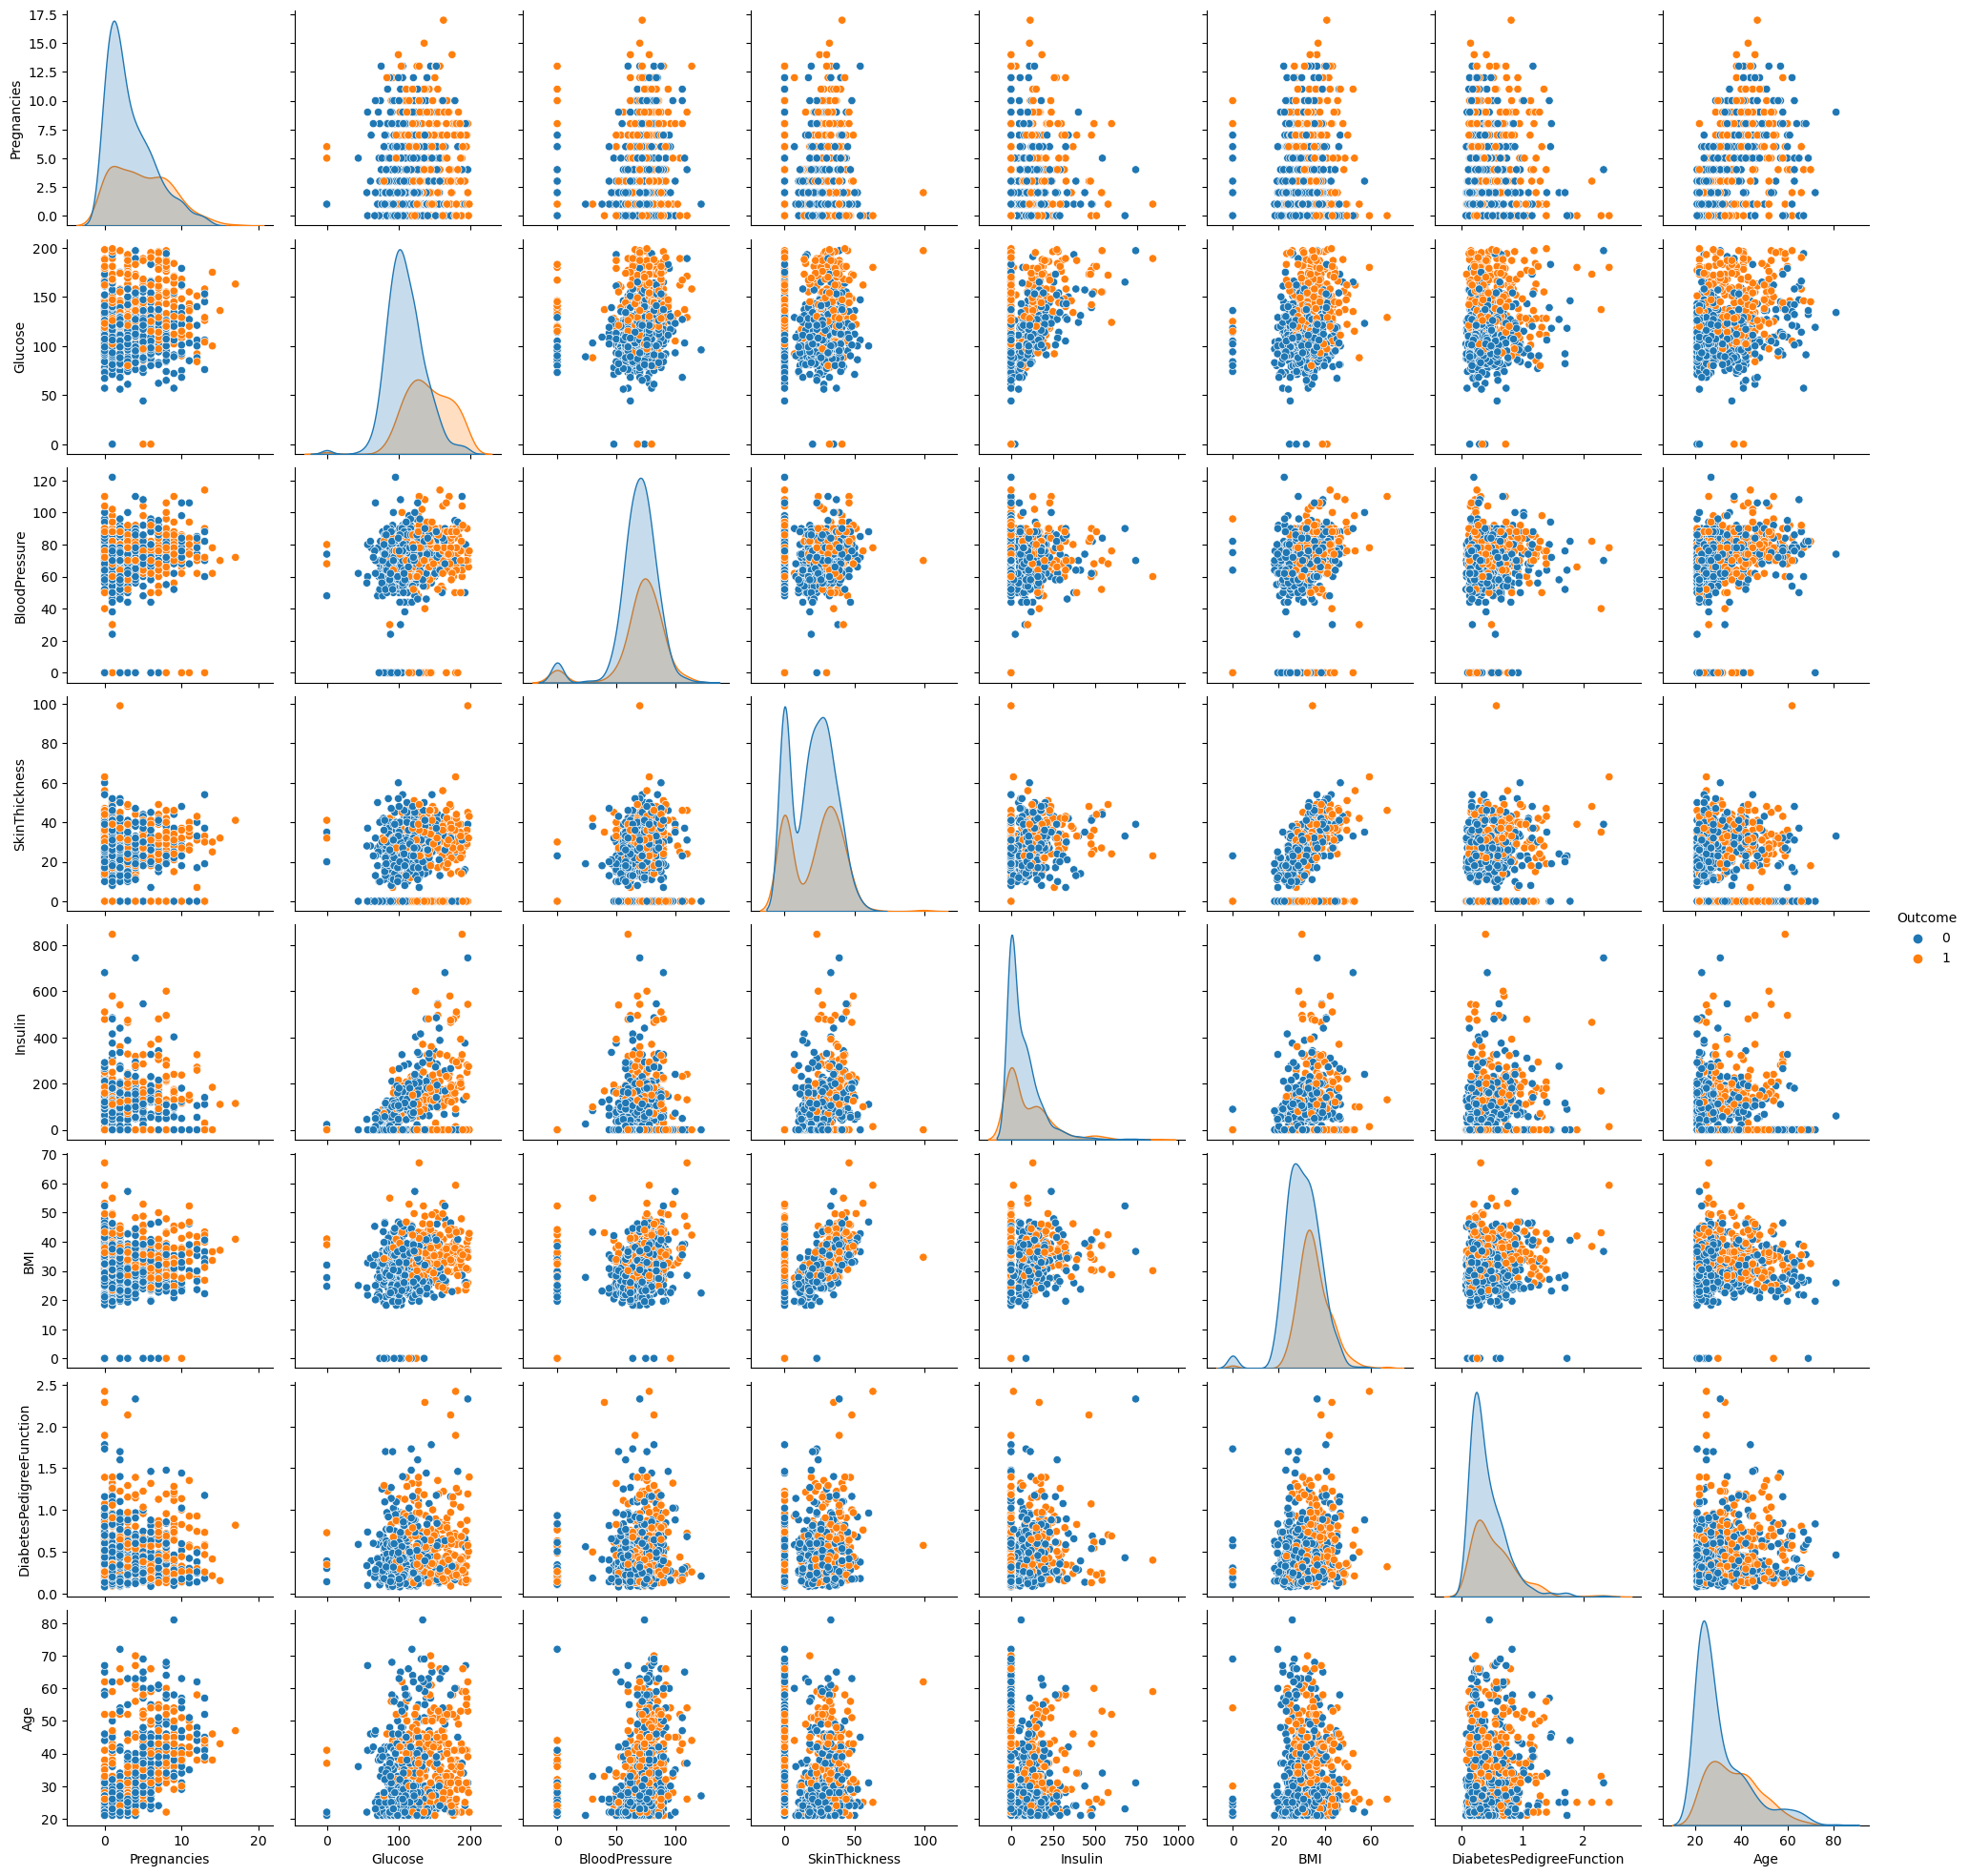

In [29]:
sns.pairplot(data,hue='Outcome')

<Axes: xlabel='Age', ylabel='BloodPressure'>

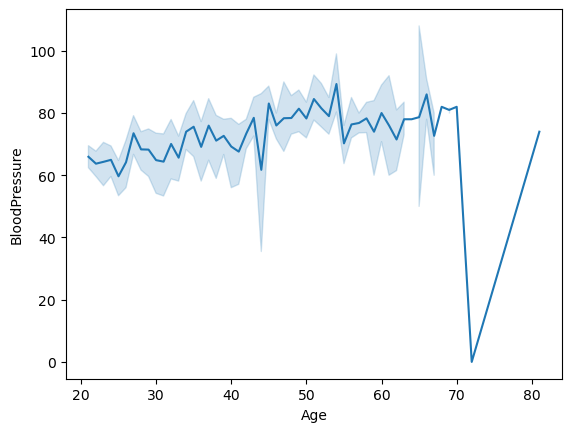

In [30]:
sns.lineplot(x=data['Age'],y=data['BloodPressure'])

In [31]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [32]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())



In [33]:
data.shape

(768, 9)

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# SEGREGATE THE DEPENDENT AND INDEPENDEENT VARIABLE

In [35]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# SPLIT THE DATA INTO TRAIN AND TEST DATA

In [36]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

# SCALLING THE DATA

In [37]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #saving the model
    file = open('diabetes.csv','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled

In [38]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [39]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

# FIT THE MODEL

In [40]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

# HYPERPARAMETER TUNING BY GridSearchCV

In [41]:




## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [42]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [43]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [44]:
clf.best_score_

0.763793103448276

let's see how well our model performs on the test data set.

In [50]:
y_pred = clf.predict(X_test_scaled)

# MODEL EVALUATION

accuracy = accuracy_score(y_test,y_pred)
accuracy

In [51]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [52]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [53]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

In [54]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [55]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [56]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

# Decision Tree Model

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [59]:
dt=DecisionTreeClassifier()

In [60]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [61]:
y1_pred=dt.predict(X_test_scaled)

In [62]:
y1_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [63]:
conf_mat = confusion_matrix(y_test,y1_pred)
conf_mat

array([[106,  24],
       [ 19,  43]], dtype=int64)

In [64]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [65]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7760416666666666

In [66]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth':[2,3,5],
    'max_features':["auto", "sqrt", "log2"],
}


In [67]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [68]:
y_pred2=clf.predict(X_test_scaled)

In [69]:
conf_mat = confusion_matrix(y_test,y_pred2)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [70]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [71]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

# Random Forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf=RandomForestClassifier()

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred3=rf.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [77]:
accuracy_score(y_test,y_pred3)

0.7708333333333334

# APPLY DEEP LEARNING

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,LeakyReLU
from keras.layers import Dropout

In [46]:
classifier=Sequential()

In [47]:
classifier.add(Dense(units=256,kernel_initializer='he_uniform',activation='relu',input_dim=8))
classifier.add(Dense(units=128,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
classifier.fit(X_train,y_train,validation_split=.30,batch_size=10,epochs=1000)

Epoch 1/1000


41/41 [==============================] - 1s 7ms/step - loss: 6.4166 - accuracy: 0.5782 - val_loss: 7.1092 - val_accuracy: 0.6763
Epoch 2/1000
41/41 [==============================] - 0s 3ms/step - loss: 3.9842 - accuracy: 0.6278 - val_loss: 2.9164 - val_accuracy: 0.5723
Epoch 3/1000
41/41 [==============================] - 0s 3ms/step - loss: 4.4580 - accuracy: 0.5980 - val_loss: 6.5423 - val_accuracy: 0.6069
Epoch 4/1000
41/41 [==============================] - 0s 3ms/step - loss: 4.3506 - accuracy: 0.6452 - val_loss: 14.1354 - val_accuracy: 0.4451
Epoch 5/1000
41/41 [==============================] - 0s 3ms/step - loss: 4.5971 - accuracy: 0.6278 - val_loss: 3.2493 - val_accuracy: 0.6185
Epoch 6/1000
41/41 [==============================] - 0s 3ms/step - loss: 3.1192 - accuracy: 0.6427 - val_loss: 4.8884 - val_accuracy: 0.6532
Epoch 7/1000
41/41 [==============================] - 0s 3ms/step - loss: 2.8002 - accuracy: 0.6303 - val_loss: 2.5701 - val_accuracy: 0.6763
Epo

Epoch 55/1000
41/41 [==============================] - 0s 4ms/step - loss: 1.3476 - accuracy: 0.6749 - val_loss: 5.6228 - val_accuracy: 0.6590
Epoch 56/1000
41/41 [==============================] - 0s 3ms/step - loss: 2.1737 - accuracy: 0.6873 - val_loss: 2.1848 - val_accuracy: 0.6532
Epoch 57/1000
41/41 [==============================] - 0s 3ms/step - loss: 1.5483 - accuracy: 0.6973 - val_loss: 2.3520 - val_accuracy: 0.6416
Epoch 58/1000
41/41 [==============================] - 0s 3ms/step - loss: 1.2531 - accuracy: 0.7097 - val_loss: 2.5808 - val_accuracy: 0.6185
Epoch 59/1000
41/41 [==============================] - 0s 4ms/step - loss: 1.1507 - accuracy: 0.7196 - val_loss: 3.0825 - val_accuracy: 0.5087
Epoch 60/1000
41/41 [==============================] - 0s 3ms/step - loss: 1.2494 - accuracy: 0.6948 - val_loss: 2.0121 - val_accuracy: 0.6763
Epoch 61/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.9366 - accuracy: 0.7097 - val_loss: 2.8515 - val_accuracy: 0.6763

Epoch 169/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.7717 - val_loss: 1.6085 - val_accuracy: 0.6763
Epoch 170/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.9535 - accuracy: 0.6998 - val_loss: 2.4669 - val_accuracy: 0.4798
Epoch 171/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.7419 - val_loss: 1.3861 - val_accuracy: 0.6301
Epoch 172/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7965 - val_loss: 1.5550 - val_accuracy: 0.6705
Epoch 173/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.7367 - accuracy: 0.7270 - val_loss: 1.3796 - val_accuracy: 0.6416
Epoch 174/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.7792 - val_loss: 1.6139 - val_accuracy: 0.6705
Epoch 175/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7816 - val_loss: 1.7878 - val_accuracy:

Epoch 226/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7965 - val_loss: 1.2765 - val_accuracy: 0.6012
Epoch 227/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.7841 - val_loss: 1.2453 - val_accuracy: 0.6532
Epoch 228/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.7916 - val_loss: 1.2374 - val_accuracy: 0.6647
Epoch 229/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8313 - val_loss: 1.4012 - val_accuracy: 0.6647
Epoch 230/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7717 - val_loss: 1.3985 - val_accuracy: 0.6127
Epoch 231/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.7990 - val_loss: 1.0965 - val_accuracy: 0.6647
Epoch 232/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7717 - val_loss: 1.0996 - val_accuracy:

Epoch 283/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3540 - accuracy: 0.8486 - val_loss: 1.0741 - val_accuracy: 0.6821
Epoch 284/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8462 - val_loss: 1.1312 - val_accuracy: 0.6705
Epoch 285/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8263 - val_loss: 1.1195 - val_accuracy: 0.6185
Epoch 286/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8065 - val_loss: 1.0580 - val_accuracy: 0.6763
Epoch 287/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7792 - val_loss: 1.2484 - val_accuracy: 0.6127
Epoch 288/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8189 - val_loss: 1.2740 - val_accuracy: 0.6127
Epoch 289/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3952 - accuracy: 0.8189 - val_loss: 1.2721 - val_accuracy:

Epoch 340/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.3724 - accuracy: 0.8238 - val_loss: 1.1026 - val_accuracy: 0.6590
Epoch 341/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8462 - val_loss: 1.2307 - val_accuracy: 0.6416
Epoch 342/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8362 - val_loss: 1.2939 - val_accuracy: 0.6590
Epoch 343/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8288 - val_loss: 1.1152 - val_accuracy: 0.6590
Epoch 344/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7792 - val_loss: 1.4690 - val_accuracy: 0.6532
Epoch 345/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8213 - val_loss: 0.9526 - val_accuracy: 0.6879
Epoch 346/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8238 - val_loss: 1.0966 - val_accuracy:

Epoch 397/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8586 - val_loss: 1.4420 - val_accuracy: 0.6069
Epoch 398/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.8139 - val_loss: 1.3055 - val_accuracy: 0.6590
Epoch 399/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8387 - val_loss: 1.2421 - val_accuracy: 0.6590
Epoch 400/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.8660 - val_loss: 1.3005 - val_accuracy: 0.6705
Epoch 401/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.2831 - accuracy: 0.8561 - val_loss: 1.4147 - val_accuracy: 0.6416
Epoch 402/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3390 - accuracy: 0.8238 - val_loss: 1.3221 - val_accuracy: 0.6127
Epoch 403/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8536 - val_loss: 1.4034 - val_accuracy:

Epoch 454/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.8685 - val_loss: 1.4440 - val_accuracy: 0.6821
Epoch 455/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.8660 - val_loss: 1.4099 - val_accuracy: 0.6532
Epoch 456/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.8834 - val_loss: 1.5216 - val_accuracy: 0.6185
Epoch 457/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.9032 - val_loss: 1.4489 - val_accuracy: 0.6647
Epoch 458/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2353 - accuracy: 0.8883 - val_loss: 1.6077 - val_accuracy: 0.6590
Epoch 459/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.9007 - val_loss: 1.5951 - val_accuracy: 0.6821
Epoch 460/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8561 - val_loss: 1.5332 - val_accuracy:

Epoch 511/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8610 - val_loss: 1.8023 - val_accuracy: 0.6358
Epoch 512/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8759 - val_loss: 1.4840 - val_accuracy: 0.6185
Epoch 513/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.8908 - val_loss: 1.6246 - val_accuracy: 0.6821
Epoch 514/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9231 - val_loss: 1.8497 - val_accuracy: 0.6590
Epoch 515/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.8759 - val_loss: 1.6584 - val_accuracy: 0.6069
Epoch 516/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.2155 - accuracy: 0.8983 - val_loss: 1.9930 - val_accuracy: 0.6358
Epoch 517/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9082 - val_loss: 2.0147 - val_accuracy:

Epoch 568/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.8983 - val_loss: 2.4923 - val_accuracy: 0.6243
Epoch 569/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9082 - val_loss: 2.4650 - val_accuracy: 0.6301
Epoch 570/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.9082 - val_loss: 2.4940 - val_accuracy: 0.5780
Epoch 571/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9404 - val_loss: 2.7723 - val_accuracy: 0.6358
Epoch 572/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1411 - accuracy: 0.9330 - val_loss: 2.7294 - val_accuracy: 0.6474
Epoch 573/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 0.9504 - val_loss: 2.7229 - val_accuracy: 0.6358
Epoch 574/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9380 - val_loss: 2.7336 - val_accuracy:

Epoch 625/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1935 - accuracy: 0.9082 - val_loss: 3.4410 - val_accuracy: 0.6358
Epoch 626/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9156 - val_loss: 3.3538 - val_accuracy: 0.6243
Epoch 627/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1466 - accuracy: 0.9504 - val_loss: 3.1948 - val_accuracy: 0.6185
Epoch 628/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1203 - accuracy: 0.9553 - val_loss: 3.4894 - val_accuracy: 0.6301
Epoch 629/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9628 - val_loss: 3.4021 - val_accuracy: 0.6185
Epoch 630/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9305 - val_loss: 3.4213 - val_accuracy: 0.6185
Epoch 631/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8759 - val_loss: 2.7624 - val_accuracy:

Epoch 682/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.9752 - val_loss: 3.5517 - val_accuracy: 0.6301
Epoch 683/1000
41/41 [==============================] - 0s 4ms/step - loss: 0.0823 - accuracy: 0.9628 - val_loss: 3.7069 - val_accuracy: 0.6301
Epoch 684/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0734 - accuracy: 0.9727 - val_loss: 3.6793 - val_accuracy: 0.6243
Epoch 685/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9727 - val_loss: 3.5532 - val_accuracy: 0.6185
Epoch 686/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9801 - val_loss: 3.6322 - val_accuracy: 0.6416
Epoch 687/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9628 - val_loss: 3.7214 - val_accuracy: 0.6590
Epoch 688/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9677 - val_loss: 3.8163 - val_accuracy:

Epoch 739/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9727 - val_loss: 4.0788 - val_accuracy: 0.6127
Epoch 740/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9454 - val_loss: 3.9596 - val_accuracy: 0.6012
Epoch 741/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1730 - accuracy: 0.9181 - val_loss: 4.2053 - val_accuracy: 0.6185
Epoch 742/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1912 - accuracy: 0.9032 - val_loss: 4.3045 - val_accuracy: 0.6185
Epoch 743/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9256 - val_loss: 3.9478 - val_accuracy: 0.5838
Epoch 744/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9603 - val_loss: 4.0592 - val_accuracy: 0.6127
Epoch 745/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.9653 - val_loss: 4.2090 - val_accuracy:

Epoch 796/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9876 - val_loss: 3.7447 - val_accuracy: 0.6416
Epoch 797/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9826 - val_loss: 3.7704 - val_accuracy: 0.6647
Epoch 798/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9826 - val_loss: 3.8026 - val_accuracy: 0.6763
Epoch 799/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9901 - val_loss: 4.0042 - val_accuracy: 0.6705
Epoch 800/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9901 - val_loss: 3.8542 - val_accuracy: 0.6358
Epoch 801/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9901 - val_loss: 4.0608 - val_accuracy: 0.6590
Epoch 802/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9826 - val_loss: 3.8762 - val_accuracy:

Epoch 853/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9851 - val_loss: 4.0320 - val_accuracy: 0.5838
Epoch 854/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9826 - val_loss: 3.9311 - val_accuracy: 0.6243
Epoch 855/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9950 - val_loss: 4.0423 - val_accuracy: 0.6416
Epoch 856/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9876 - val_loss: 4.0993 - val_accuracy: 0.6358
Epoch 857/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9826 - val_loss: 4.2073 - val_accuracy: 0.6416
Epoch 858/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9801 - val_loss: 4.5348 - val_accuracy: 0.6127
Epoch 859/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9801 - val_loss: 4.3883 - val_accuracy:

Epoch 910/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 5.2844 - val_accuracy: 0.6590
Epoch 911/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9727 - val_loss: 5.0567 - val_accuracy: 0.6416
Epoch 912/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9479 - val_loss: 5.8529 - val_accuracy: 0.5780
Epoch 913/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.1693 - accuracy: 0.9404 - val_loss: 4.8152 - val_accuracy: 0.6012
Epoch 914/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9727 - val_loss: 4.7780 - val_accuracy: 0.6127
Epoch 915/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9727 - val_loss: 4.4292 - val_accuracy: 0.6532
Epoch 916/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9752 - val_loss: 4.7359 - val_accuracy:

Epoch 967/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9851 - val_loss: 5.6294 - val_accuracy: 0.6358
Epoch 968/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 5.5386 - val_accuracy: 0.6301
Epoch 969/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9950 - val_loss: 5.6714 - val_accuracy: 0.6358
Epoch 970/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 5.7088 - val_accuracy: 0.6301
Epoch 971/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 5.7497 - val_accuracy: 0.6243
Epoch 972/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9975 - val_loss: 5.7664 - val_accuracy: 0.6532
Epoch 973/1000
41/41 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9975 - val_loss: 5.8297 - val_accuracy:

In [43]:
#import pickle
#pickle.dump(log_reg,file)
#file.close()